<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Li%C3%A7%C3%A3o/Resolvendo%20Exerc%C3%ADcio%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/FIFA.csv'
df_Fifa = pd.read_csv(url)

df_Fifa.set_index('ID', inplace=True)

nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Exercício 9
# 1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso)
url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/FIFA.csv'
df_Fifa = pd.read_csv(url)

In [ ]:
df_Fifa.set_index('ID', inplace=True)

In [ ]:
# Convertendo o nome das colunas para minúsculo (Resolução do item 5.a) do Jeito do Nélio):
nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]
df_Fifa.columns

Index(['unnamed: 0', 'name', 'age', 'photo', 'nationality', 'flag', 'overall',
       'potential', 'club', 'club logo', 'value', 'wage', 'special',
       'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'real face', 'position',
       'jersey number', 'joined', 'loaned from', 'contract valid until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle'

In [ ]:
df_Fifa.head()

In [ ]:
# Exercício 9
# 2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
# Colunas que eu eliminaria inicialmente são aquelas com foto ('Photo'), bandeira do país ('Flag'), logo do clube ('Club Logo'),
# por não serem relevantes para análise de dados.
# Pensei em eliminar outros aí abaixo relacionados, mas vi depois que o exercício pede informações sobre potência e etc
''' 
df_Fifa = df_Fifa.drop(['Unnamed: 0','Photo','Flag','Overall', 'Potential','Club Logo',
        'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
        'Skill Moves', 'Work Rate', 'Real Face','Jersey Number','Loaned From',
        'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis = 1)
'''
###

In [ ]:
# Exercício 9
# 3. Qual o dtype de cada variável/atributo do dataframe?
# minha observação: dtypes e info() => diferenças

df_Fifa.dtypes   # df_Fifa.info => aparecem as informações de todas as colunas sem truncar, vide execução adiante

In [ ]:
df_Fifa.columns

In [ ]:
df_Fifa.shape

In [ ]:
df_Fifa.info()

In [ ]:
pd.options.display.max_info_columns     # mostra qtde máxima de colunas que podem ser exibidas

In [ ]:
# Exercício 9
# 4. Se alguma variável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

In [ ]:
# Colunas 'value' e 'wage' são object e apresentam primeiro caracter '€' e último caracter 'M' (million) e 'K' (thousand)

# Inicialmente eliminando notação:

def elimina_notacao(moeda):
    moeda = moeda.replace('€','').replace('M','000000').replace('K','000')
    return moeda

df_Fifa['value'] = df_Fifa['value'].apply(elimina_notacao)
df_Fifa['wage'] = df_Fifa['wage'].apply(elimina_notacao)

# Alterando string para numeric:

df_Fifa['value'] = pd.to_numeric(df_Fifa['value'])
df_Fifa['wage'] = pd.to_numeric(df_Fifa['wage'])

KeyError: ignored

In [ ]:
df_Fifa['value']

In [ ]:
df_Fifa['wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: wage, Length: 18207, dtype: int64

In [ ]:
df_Fifa

,unnamed: 0,id,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,...,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,565000,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,290000,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,60000.0,1000,1307,Right,1.0,2.0,2

In [ ]:
df_Fifa.columns

In [ ]:
type(df_Fifa.columns)

In [ ]:
l_indice_colunas_object = ['st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

In [ ]:
type(l_indice_colunas_object)

In [ ]:
# Converter object no formato '83+4' para numeric '87'

l_indice_colunas_object = ['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

for i in l_indice_colunas_object:
  df_num = [0,1]
  df_num[0] = df_Fifa[i].str.split('+', n=2, expand= True)[0]
  df_num[1] = df_Fifa[i].str.split('+', n=2, expand= True)[1]
  df_num[0]=pd.to_numeric(df_num[0])
  df_num[1]=pd.to_numeric(df_num[1])
  df_Fifa[i]=df_num[0] + df_num[1]

df_Fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
         'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0
18203,47.0,47.0,47.0,41.0,44.0,44.0,44.0,41.0,42.0,42.0,42.0,40.0,37.0,37.0,37.0,40.0,32.0,33.0,33.0,33.0,32.0,31.0,34.0,34.0,34.0,31.0
18204,47.0,47.0,47.0,47.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,46.0,40.0,40.0,40.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,30.0,30.0,30.0,35.0
18205,49.0,49.0,49.0,49.0,48.0,48.0,48.0,49.0,47.0,47.0,47.0,48.0,41.0,41.0,41.0,48.0,38.0,34.0,34.0,34.0,38.0,37.0,33.0,33.0,33.0,37.0


In [ ]:
df_Fifa[['ls','st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]

In [ ]:
df_Fifa.info()

In [ ]:
df_Fifa['ls']

In [ ]:
df_ls = df_Fifa[['ls']]
df_ls

,ls
0,88+2
1,91+3
2,84+3
3,NaN
4,82+3
...,...
18202,42+2
18203,45+2
18204,45+2
18205,47+2


In [ ]:
l_num = ['antes','depois']

In [ ]:
type(df_num)

list

In [ ]:
d_num = (columns:'antes','depois')

SyntaxError: ignored

In [ ]:
d_num = {columns :'antes','depois'}
l_num['antes'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[0]
l_num['depois'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[1]
l_num['antes']=pd.to_numeric(l_num[0])
l_num['depois']=pd.to_numeric(l_num[1])
df_Fifa['ls']=l_num['antes']+l_num['depois']


TypeError: ignored

In [ ]:
d_num = {columns :'antes','depois'}
l_num['antes'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[0]
l_num['depois'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[1]
l_num['antes']=pd.to_numeric(l_num[0])
l_num['depois']=pd.to_numeric(l_num[1])
df_Fifa['ls']=l_num['antes']+l_num['depois']


TypeError: ignored

In [ ]:
d_num = {columns :'antes','depois'}
l_num['antes'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[0]
l_num['depois'] = df_Fifa['ls'].str.split('+', n=2, expand= True)[1]
l_num['antes']=pd.to_numeric(l_num[0])
l_num['depois']=pd.to_numeric(l_num[1])
df_Fifa['ls']=l_num['antes']+l_num['depois']


TypeError: ignored

In [ ]:
df_Fifa['ls']

[0         88
 1         91
 2         84
 3        NaN
 4         82
         ... 
 18202     42
 18203     45
 18204     45
 18205     47
 18206     43
 Name: 0, Length: 18207, dtype: object, 0          2
 1          3
 2          3
 3        NaN
 4          3
         ... 
 18202      2
 18203      2
 18204      2
 18205      2
 18206      2
 Name: 1, Length: 18207, dtype: object]

In [ ]:
type(df_num)

list

In [ ]:
df_num[0]=pd.to_numeric(df_num[0])
df_num[1]=pd.to_numeric(df_num[1])

In [ ]:
df_num[0]+df_num[1]

0        90.0
1        94.0
2        87.0
3         NaN
4        85.0
         ... 
18202    44.0
18203    47.0
18204    47.0
18205    49.0
18206    45.0
Length: 18207, dtype: float64

In [ ]:
df_Fifa['ls']=df_num[0]+df_num[1]
df_Fifa['ls']

0        90.0
1        94.0
2        87.0
3         NaN
4        85.0
         ... 
18202    44.0
18203    47.0
18204    47.0
18205    49.0
18206    45.0
Name: ls, Length: 18207, dtype: float64

In [ ]:
df_ls['antes'] = df_ls['ls'].str.split('+', n=2, expand= True)[0]
df_ls['antes']
df_ls['depois'] = df_ls['ls'].str.split('+', n=2, expand= True)[1]
df_ls['depois']

In [ ]:
df_ls.info()

In [ ]:
df_ls['antes']=pd.to_numeric(df_ls['antes'])

In [ ]:
df_ls.info()

In [ ]:
df_ls['depois']=pd.to_numeric(df_ls['depois'])

In [ ]:
df_ls.info()

In [ ]:
df_ls['ls_float'] = df_ls['antes'] + df_ls['depois']

In [ ]:
df_ls

In [ ]:
df_Fifa['ls'] = df_ls['ls_float']

In [ ]:
df_Fifa['ls']

In [ ]:
# Exercício 9
# 5.a) Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo.
# 5.b) Há Missing values nos dados? 
# 5.c) Se sim, qual sua proposta (proposta do grupo) para tratar esses Missing values?

In [ ]:
# Resolução do item 5.a) de 2 maneiras:
# Modo 1 (Jeito do Nélio):
nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]
df_Fifa.columns

In [ ]:
# Modo 2 (jeito do Cristiano):
df_Fifa_lower = df_Fifa.copy()
df_Fifa_lower = df_Fifa_lower.rename(columns=str.lower)
df_Fifa_lower

In [ ]:
# Exercício 9
# 6.a) Há Missing values nos dados? 
# 6.b) Se sim, qual sua proposta (proposta do grupo) para tratar esses Missing values?

df_Fifa.info()

In [ ]:
# Sim, há Missing values pois ao rodar df.info() várias colunas indicam valores non-null menores que o número total de linhas (18207 linhas).

df_Fifa.isna().sum()

In [ ]:
df_Fifa.isnull().sum()

In [ ]:
# 7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
df_Fifa.head()

In [ ]:
df_Fifa.groupby('nationality')['nationality'].count()       # vide abaixo value_counts (tb resulta em uma série) e Counter (resulta em um dicionário)

In [ ]:
type(_121)

In [ ]:
df_Fifa.value_counts(['nationality'])     # igual a: df_Fifa['nationality'].value_counts()

In [ ]:
type(_6)

In [ ]:
# Dúvida: como transformar pd series em tabela como feito abaixo com o Counter?

# Descobri!!!
# pega o index e o values da series e aplica o pd.Dataframe

In [ ]:
from collections import Counter
d_nationality = Counter(df_Fifa['Nationality'])     # Counter retorna um dicionário

In [ ]:
d_nationality

In [ ]:
d_nationality.keys()

In [ ]:
d_nationality.values()

In [ ]:
df_nationality = pd.DataFrame({'Nome do País': d_nationality.keys(), 'Número de Jogadores' : d_nationality.values()})

In [ ]:
df_nationality        # não está em ordem decrescente de qtde de jogadores

In [ ]:
df_nationality.sort_values(by=['Número de Jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality

In [ ]:
# 7. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality')
# Resolução de 2 jeitos

In [ ]:
df_nat_age = df_Fifa[['Nationality','Age']]

In [ ]:
df_nat_age

In [ ]:
df_nat_age.shape[0]

In [ ]:
df_nationality.shape[0]

In [ ]:
df_nat_md_age = pd.DataFrame({'Nome do País': d_nationality.keys(), 'Número de Jogadores' : d_nationality.values(), 'Soma das idades': 0})

In [ ]:
df_nat_md_age

In [ ]:

# Calculando a média de idade dos jogadores por país "na unha" (sem usar 'groupby'):

# df_nat_age.shape[0]       # 18207
# df_nationality2.shape[0]   # 164

df_nationality2 = pd.DataFrame({'Nome do País': d_nationality.keys(), 'Número de Jogadores' : d_nationality.values(), 'Soma das idades': 0})
linha_1 = 0
while linha_1 < df_nationality2.shape[0]: # 164
  soma_age = 0
  linha_2 = 0
  while linha_2 < df_nat_age.shape[0]:  # 18207
    if df_nat_age.iat[linha_2,0] == df_nationality2.iat[linha_1,0]:
      soma_age = soma_age + df_nat_age.iat[linha_2,1]
    linha_2 = linha_2 + 1
  df_nationality2.iat[linha_1,2] = soma_age 
linha_1 = linha_1 + 1
  

In [ ]:
df_nationality2

In [ ]:
df_nationality2['Nome do País'] == 'Afghanistan'

In [ ]:
df_nationality2[_131]

In [ ]:
df_nationality2['Média Idade por país'] = round(df_nationality2['Soma das idades'] / df_nationality2['Número de Jogadores'], 2)

In [ ]:
df_nationality2

In [ ]:
df_nationality2.sort_values(by=['Número de Jogadores'], ascending= False, inplace= True, ignore_index= True)

In [ ]:
df_nationality2

In [ ]:
# Calculando o mesmo exercício 9
# 8. média de idade dos jogadores por país, mas usando o groupby
nat_age_soma = df_Fifa.groupby('Nationality')['Age'].sum()

In [ ]:
nat_age_soma.index

In [ ]:
nat_age_soma.values

In [ ]:
nat_nat_numjog = df_Fifa.groupby('Nationality')['Nationality'].count()

In [ ]:
nat_nat_numjog.index

In [ ]:
nat_nat_numjog.values

In [ ]:
nat_numjog_somaidade = pd.DataFrame({'Nationality': nat_nat_numjog.index, 'Num Jogadores': nat_nat_numjog.values, 'Somatória Idade': nat_age_soma.values})

In [ ]:
nat_numjog_somaidade

In [ ]:
nat_numjog_somaidade['Média Idade dos jogadores por país'] = nat_numjog_somaidade['Somatória Idade'] / nat_numjog_somaidade['Num Jogadores']

In [ ]:
nat_numjog_somaidade

In [ ]:
# df_Fifa.groupby('nationality')['nationality'].count()
# nationality
# Afghanistan      4

# df_Fifa.groupby('nationality')['age'].sum()
# nationality
# Afghanistan      90




In [ ]:
# 9. Qual o número de jogadores por idade?

df_Fifa.groupby('Age')['Age'].count()

In [ ]:
df_numjog_idade = pd.DataFrame({'Idade':(df_Fifa.groupby('Age')['Age'].count()).index, 'Num Jogadores':(df_Fifa.groupby('Age')['Age'].count()).values})
df_numjog_idade

In [ ]:
# 10. Quantos jogadores possuem cada clube?

df_Fifa.head(1)

In [ ]:
df_Fifa['Club']

In [ ]:
_160.unique()

In [ ]:
_162.size

In [ ]:
df_Fifa.groupby('Club')['Club'].count()     # retorna valores "not NaN" => 651

In [ ]:
_172.index

In [ ]:
_173.unique()

In [ ]:
_158.size

In [ ]:
l1 = pd.Series((df_Fifa.groupby('Club')['Club'].count()).index)

In [ ]:
l2 = pd.Series((df_Fifa['Club'].unique()))      # retorna inclusive valores NaN => 652

In [ ]:
l1

In [ ]:
l2

In [ ]:
(df_Fifa['Club'].unique()).size

In [ ]:
l2[l2.isnull()]

In [ ]:
l2[85]

In [ ]:
# Resposta do Exercício 9.10)
# 10. Quantos jogadores possuem cada clube? São 651 clubes com 17966 jogadores (241 estão sem clube)
df_club_numjog = pd.DataFrame({'Club': (df_Fifa.groupby('Club')['Club'].count()).index, 'Num Jogadores': (df_Fifa.groupby('Club')['Club'].count()).values})

In [ ]:
df_club_numjog

In [ ]:
df_club_numjog['Num Jogadores'].sum()     
# 18207 => qtde de jogadores
# 17966 => qtde de jogadores com 'club' not NaN
# 18207 - 17966 = 241 => qtde de jogadores com 'club' NaN

In [ ]:
df_Fifa['Club'].isnull()

In [ ]:
df_Fifa[df_Fifa['Club'].isnull()]

In [ ]:
df_Fifa['Club Logo'].isna()

In [ ]:
df_Fifa[df_Fifa['Club Logo'].isna()]

In [ ]:
df_Fifa[df_Fifa['Flag'].isna()]

In [ ]:
'https://cdn.sofifa.org/flags/52.png' isin

In [ ]:
a_club_logo = df_Fifa['Club Logo'].unique()

In [ ]:
type(a_club_logo)

In [ ]:
len(a_club_logo)

In [ ]:
a_club_logo

In [ ]:
a_flag = df_Fifa['Flag'].unique()

In [ ]:
type(a_flag)

In [ ]:
len(a_flag)

In [ ]:
a_flag

In [ ]:
df_fccl = df_Fifa[['Flag','Club','Club Logo']]

In [ ]:
df_fccl[df_fccl['club logo'] == 'https://cdn.sofifa.org/flags/52.png']

In [ ]:
df_Fifa[df_Fifa['Club'].isnull()].head()

In [ ]:
# 10. Qual a média de idade por clube?

df_Fifa.groupby('Club')['Age'].sum()

In [ ]:
# Dúvida: não consigo fazer divisão entre ndarrays?
(df_Fifa.groupby('Club')['Age'].sum()).values() / (df_Fifa.groupby('Club')['Club'].count()).values()

In [ ]:
df_media_idade_por_clube = pd.DataFrame({'Club': (df_Fifa.groupby('Club')['Age'].sum()).index,
                                         'Somatório Idade': (df_Fifa.groupby('Club')['Age'].sum()).values, 
                                         'Num Jogadores': (df_Fifa.groupby('Club')['Club'].count()).values})

In [ ]:
df_media_idade_por_clube.head()

In [ ]:
df_media_idade_por_clube['Média de idade por Clube']= df_media_idade_por_clube['Somatório Idade'] / df_media_idade_por_clube['Num Jogadores']

In [ ]:
df_media_idade_por_clube

In [ ]:
# 11. Qual a média de salário por país?   # wage

In [ ]:
df_Fifa.columns

In [ ]:
df_Fifa['Wage']

In [ ]:
# eliminando € e convertendo M e K na variável 'wage'

df_Fifa2 = df_Fifa.copy()

def elimina_caracter(moeda):
  moeda = moeda.replace("€","").replace("M","000000").replace("K","000")
  return moeda

df_Fifa2['wage'] = df_Fifa2['wage'].apply(elimina_caracter)

df_Fifa2['wage'] = pd.to_numeric(df_Fifa2['wage'])

df_Fifa2['wage']

In [ ]:
# Dúvida: sintaxe
'''
* Os componentes do comando Groupby()
    * **Grouping_Column** - Coluna Categórica pelo qual os dados serão agrupados;
    * **Aggregating_Column** - Coluna numérica cujos valores serão agrupados;
    * **Aggregating_Function** - Função agregadora, ou seja: sum, min, max, mean, median, etc...

df.groupby('Grouping_Column').agg({'Aggregating_Column': 'Aggregating_Function'})
OU
df['Aggregating_Column'].groupby(df['Grouping_Column']).Function()
'''

In [ ]:
s_nat_wage = df_Fifa2.groupby('nationality')['wage'].sum()

In [ ]:
s_nat_jog = df_Fifa2.groupby('nationality')['nationality'].count()

In [ ]:
type(s_nat_wage)

In [ ]:
df_nat_wage = pd.DataFrame({'nationality':s_nat_wage.index,'wage':s_nat_wage.values, "Número de Jogadores":s_nat_jog.values})

In [ ]:
df_nat_wage['Média Salário por país'] = round(df_nat_wage['wage']/df_nat_wage['Número de Jogadores'],2)

In [ ]:
df_nat_wage       # Resposta do Exercício 9.11

In [ ]:
# 12. Qual a média de salário por clube?
s_club_wage = df_Fifa2.groupby('club')['wage'].sum()

In [ ]:
s_club_jog = df_Fifa2.groupby('club')['club'].count()

In [ ]:
df_club_md_sal = pd.DataFrame({'club':s_club_jog.index,'Somatória Wage':s_club_wage.values,"Núm Jogadores":s_club_jog.values})

In [ ]:
df_club_md_sal['Média Salário por Clube'] = round(df_club_md_sal['Somatória Wage']/df_club_md_sal['Núm Jogadores'],2)

In [ ]:
df_club_md_sal

In [ ]:
# 13. Qual a média de salário por idade?

In [ ]:
s_age_age = df_Fifa2.groupby('age')['age'].count()

In [ ]:
s_age_wage = df_Fifa2.groupby('age')['wage'].sum()

In [ ]:
df_age_md_wage = pd.DataFrame({'age':s_age_age.index, 'Somatória Wage': s_age_wage.values})

In [ ]:
df_age_md_wage['Média salarial por idade'] = round(df_age_md_wage['Somatória Wage']/df_age_md_wage['age'],2)

In [ ]:
df_age_md_wage

In [ ]:
# 14. Quanto cada clube gasta com pagamento de salários?
df_Fifa2.groupby('club')['wage'].sum()

club
 SSV Jahn Regensburg     123000
1. FC Heidenheim 1846    125000
1. FC Kaiserslautern      44000
1. FC Köln               372000
1. FC Magdeburg          127000
                          ...  
Zagłębie Sosnowiec        27000
Çaykur Rizespor          193000
Örebro SK                 40000
Östersunds FK             45000
Śląsk Wrocław             51000
Name: wage, Length: 651, dtype: int64

In [ ]:
df_14 = pd.DataFrame({'club':_35.index, 'Somatória Wage':_35.values})

Exception: ignored

In [ ]:
df_14.head()

In [ ]:
# 16. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?


In [ ]:
df_Fifa.columns

In [ ]:
df_col_selec = df_Fifa[['Name','Age','Overall','Potential','Club','Value','Wage','Contract Valid Until','Release Clause']]

In [ ]:
df_teste = df_Fifa[['Age','Overall','Potential','Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position',
        'Joined', 'Loaned From', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [ ]:
df_teste.info()

In [ ]:
df_teste['Potential'] - df_teste['Overall']

In [ ]:
type(_56)

In [ ]:
df_teste2 = pd.concat([df_teste,_56], axis = 1)

In [ ]:
 df1 = df_teste2[['Overall', 'Potential', 'DIF','International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

In [ ]:
df1.sort_values(by=['DIF'],ascending=False)

In [ ]:
# 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?

In [ ]:
df_Fifa[['Overall','Age','Club','Nationality']]

In [ ]:
# Perguntar pro Silvio Finotti
# corrigir, incompleto
# df_Fifa.groupby('club').agg({'overall':['mean','median,'sum']}).sort_values('overall',ascending=False.head(10))].sum()

In [ ]:
# 17. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

df_17 = df_Fifa[['club','potential','overall']]

In [ ]:
df_Fifa.groupby('club')['club'].count()
df_Fifa.groupby('club')['potential'].sum()
df_Fifa.groupby('club')['overall'].sum()

df_17 = pd.DataFrame({'club':(df_Fifa.groupby('club')['club'].count()).index,
                      'Num Jogadores': (df_Fifa.groupby('club')['club'].count()).values,
                      'Potential_Somatória':(df_Fifa.groupby('club')['potential'].sum()).values,
                      'Overall_Somatória':(df_Fifa.groupby('club')['overall'].sum()).values,
                      'Potential_Média':((df_Fifa.groupby('club')['potential'].sum()).values/(df_Fifa.groupby('club')['club'].count()).values),
                      'Overall_Média':((df_Fifa.groupby('club')['overall'].sum()).values/(df_Fifa.groupby('club')['club'].count()).values)
                      })

In [ ]:
# Resolução do Exercício 9, item 17: melhores clubes considerando Potential e Overall
# 5 primeiros considerando 'Potential_Média'
df_17.sort_values(by=['Potential_Média'], ascending=False).head()

In [ ]:
# 5 primeiros considerando 'Overall_Média'
df_17.sort_values(by=['Overall_Média'], ascending=False).head()

In [ ]:
# 5 primeiros considerando média entre 'Potential Média' e 'Overall Média'
df_17['Média_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])/2
df_17.sort_values(by=['Média_PM_OM'], ascending=False).head()

In [ ]:
# 5 primeiros considerando Soma entre 'Potential Média' e 'Overall Média'
df_17['Soma_PM_OM'] = (df_17['Potential_Média'] + df_17['Overall_Média'])
df_17.sort_values(by=['Soma_PM_OM'], ascending=False).head()

In [ ]:
# 19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.

df_Fifa.columns

In [ ]:
df_Fifa[['Position','Positioning','GKPositioning']]

In [ ]:
df_Fifa['Position'].unique()

In [ ]:
df_Fifa['Position'] == 'GK'

In [ ]:
df_19 = df_Fifa[(df_Fifa['Position'] == 'GK')]

In [ ]:
# Resposta do Exercício 9 , item 19: ranking dos goleiros ('Position' == 'GK') por Potencial, Overall
df_19[['Position','Potential','Overall']]

In [ ]:
# 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=)?
df_20 = df_Fifa[['Name','SprintSpeed']]

In [ ]:
# Resposta do Exercício 9, item 20: jogadores mais rápidos (com maior valor de SprintSpeed)
df_20.sort_values(by='SprintSpeed', ascending= False)

In [ ]:
# 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

df_21 = df_Fifa[['Name', 'ShotPower']]

In [ ]:
# Resposta do Exercício 9, item 21: 5 melhores jogadores em termos de ShotPower)
df_21.sort_values(by= 'ShotPower', ascending=False).head(10)

,Name,ShotPower
1,Cristiano Ronaldo,95.0
378,Hulk,94.0
1348,F. Guarín,93.0
890,L. Podolski,92.0
36,G. Bale,92.0
102,Naldo,92.0
4,K. De Bruyne,91.0
291,A. Kolarov,91.0
45,P. Pogba,90.0
3921,V. Ayala,90.0


In [ ]:
# 22. Quem são os outliers em termos de salário?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/FIFA.csv'
df_Fifa = pd.read_csv(url)

df_Fifa.set_index('ID', inplace=True)

nome_colunas = df_Fifa.columns
df_Fifa.columns = [col.lower() for col in nome_colunas]

df_Fifa2 = df_Fifa.copy()

def elimina_caracter(moeda):
  moeda = moeda.replace("€","").replace("M","000000").replace("K","000")
  return moeda

df_Fifa2['wage'] = df_Fifa2['wage'].apply(elimina_caracter)

df_Fifa2['wage'] = pd.to_numeric(df_Fifa2['wage'])

df_Fifa['wage'] = df_Fifa2['wage']

'Q1: [1000.], Q3: [9000.], Q2: [3000.], lim_inferior_outlier: [-11000.], lim_superior_outlier: [21000.]'

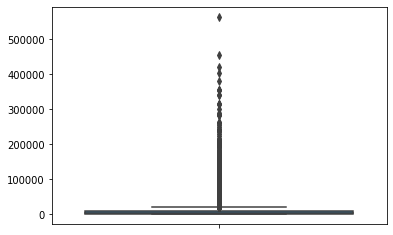

In [ ]:
df_wage = df_Fifa[['name','wage']]

s_wage = df_Fifa['wage']
a_wage = s_wage.values

is_nan = np.isnan(a_wage)

a_wage[is_nan]

a_club = df_Fifa['club']

f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

a_wage.sum()/18207

import seaborn as sns
sns.boxplot(y = a_wage)

Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'


In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

'Média: 9731.312132696215; Mediana: 3000.0; STD: 21998.686253949738'

In [ ]:
df_Fifa['wage']>lim_superior_outlier[0]

ID
158023     True
20801      True
190871     True
193080     True
192985     True
          ...  
238813    False
243165    False
241638    False
246268    False
246269    False
Name: wage, Length: 18207, dtype: bool

In [ ]:
df_Fifa['name'][_13]

ID
158023             L. Messi
20801     Cristiano Ronaldo
190871            Neymar Jr
193080               De Gea
192985         K. De Bruyne
                ...        
213642            J. Wilson
231856        Álvaro Tejero
245238         Javi Sánchez
225105      Cristo González
241467      F. Feuillassier
Name: name, Length: 2031, dtype: object

In [ ]:
type(lim_superior_outlier)

numpy.ndarray

In [ ]:
lim_superior_outlier

array([21000.])

In [ ]:
# df_Fifa2 tem 'Wage' sem notações e transformado de string para int64
df_wage = df_Fifa2[['Name','Wage']]

In [ ]:
s_wage = df_Fifa2['Wage']

In [ ]:
type(s_wage)

In [ ]:
a_wage = s_wage.values
a_wage

In [ ]:
len(a_wage)

In [ ]:
is_nan = np.isnan(a_wage)
is_nan


In [ ]:
a_wage[is_nan]

In [ ]:
a_club = df_Fifa['Club']
a_club

In [ ]:
aa = a_club.values
aa

In [ ]:
import numpy as np
aa == 'Nan'

In [ ]:
aa[_228]

In [ ]:
df_Fifa[_208]

In [ ]:
df_Fifa2[_205]

In [ ]:
f'Média: {np.mean(s_wage.values)}; Mediana: {np.median(s_wage.values)}; STD: {np.std(s_wage.values)}'

In [ ]:
a_wage.sum()/18207

In [ ]:
# Import a biblioteca seaborn:
import seaborn as sns

# Boxplot antes dos "outliers"
sns.boxplot(y = a_wage)

In [ ]:
Q1 = np.percentile(a_wage, q = [25])
Q3 = np.percentile(a_wage, q = [75])
Q2 = np.percentile(a_wage, q = [50])
p99 = np.percentile(a_wage, q = [99])
p95 = np.percentile(a_wage, q = [95])

IQR = Q3-Q1 # Diferença interquartílica
lim_inferior_outlier = Q1-1.5*IQR
lim_superior_outlier = Q3+1.5*IQR

In [ ]:
f'Q1: {Q1}, Q3: {Q3}, Q2: {Q2}, lim_inferior_outlier: {lim_inferior_outlier}, lim_superior_outlier: {lim_superior_outlier}'

In [ ]:
len(_162)

In [ ]:
_140.values

In [ ]:
sum(_152)

In [ ]:
df_w = pd.DataFrame([])

In [ ]:
# 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
# 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
# 19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
# 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
# 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
# 22. Quem são os outliers em termos de salário?
# 23. Quem são os outliers em termos de potência no chute?